# Linear Regression

In [11]:
#Import basic packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#Import training dataset 
#file = '//Users//chung-tsengwang//Desktop//Github Repo//Predicting-NBA-Rookie-Stats//data//processed//final.csv'
file = 'C:\\Users\\Chung-Tseng Wang\\Desktop\\NBA-Rookie-Stat-Predictions\\data\\processed\\final.csv'
data = pd.read_csv(file)
data = data[['year', 'Player','Position','G', 'GS', 'MP','FG', 'FGA',
       'FGP','2P','2PA', '2PP', '3P', '3PA', '3P%','FT', 'FTA', 'FTP','ORB', 'DRB','TRB','AST','STL','BLK'
        ,'TOV','PTS', 'SOS','PER','eFGP','WS','NBA_G','NBA_FGP','NBA_3PP','NBA_FTP','NBA_PTS','NBA_TRB','NBA_AST','NBA_STL','NBA_BLK','NBA_TOV']]
data = data.set_index(['Player','year'])
data.head()

,,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,2PP,...,NBA_G,NBA_FGP,NBA_3PP,NBA_FTP,NBA_PTS,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV
Player,year,,,,,,,,,,,,,,,,,,,,,
Marshall Plumlee,2017,Center,124.0,36.0000,14.30000,1.3,1.9,0.665,1.2,1.9,0.664,...,29,0.515,0.283958,0.571,1.9,2.3,0.4,0.137931,0.172414,0.517241
Chris McCullough,2016,Forward,16.0,16.0000,28.10000,3.4,7.1,0.478,3.3,7.0,0.473,...,59,0.426,0.306000,0.548,3.3,1.9,0.3,0.508475,0.322034,0.338983
Drew Gordon,2015,Forward,61.0,53.0000,29.60000,5.3,10.0,0.535,5.3,10.0,0.534,...,9,0.421,0.000000,0.500,1.9,2.0,0.2,0.111111,0.000000,0.888889
Tyler Johnson,2015,Guard,5.0,69.2525,27.27375,0.2,0.6,0.333,0.0,0.4,0.000,...,270,0.433,0.364000,0.771,11.0,3.3,2.5,0.944444,0.474074,1.203704
Jeff Withey,2014,Center,117.0,76.0000,19.80000,2.8,4.9,0.568,2.8,4.9,0.567,...,206,0.525,0.143000,0.716,3.2,2.5,0.3,0.271845,0.757282,0.368932


In [42]:
#Import target dataset
file = 'C:\\Users\\Chung-Tseng Wang\\Desktop\\NBA-Rookie-Stat-Predictions\\data\\processed\\college_2020_processed.csv'
target = pd.read_csv(file)
target = target.set_index(['Player','year'])
target = target.drop(['School'], axis = 1)
target.head()

,,2P,2PA,2PP,3P,3P%,3PA,AST,BLK,DRB,FG,...,ORB,PTS,SOS,STL,TOV,TRB,Position,eFGP,PER,WS
Player,year,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,2020,8.2,11.0,0.747,0.7,0.338,2.2,2.1,1.8,5.4,9.0,...,3.5,22.6,11.97,2.1,2.4,8.9,Forward,70.8,40.8,8.3
RJ Barrett,2020,6.5,12.2,0.529,1.9,0.308,6.2,4.3,0.4,6.0,8.4,...,1.6,22.6,11.97,0.9,3.2,7.6,Forward,50.6,23.3,6.5
De'Andre Hunter,2020,3.4,6.3,0.541,0.9,0.419,2.3,1.6,0.5,3.1,4.4,...,1.3,12.4,9.61,0.6,1.2,4.4,Guard,56.4,24.0,11.0
Darius Garland,2020,3.6,6.2,0.581,2.2,0.478,4.6,2.6,0.4,3.4,5.8,...,0.4,16.2,7.79,0.8,3.0,3.8,Guard,63.9,23.6,0.5
Jarrett Culver,2020,3.9,7.5,0.522,1.4,0.341,4.1,2.8,0.6,4.4,5.3,...,1.2,14.9,9.56,1.3,2.1,5.6,Guard,51.8,22.4,11.0


## Scaling data

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

le = LabelEncoder()
data.Position = le.fit_transform(data['Position'])
data.head()

,,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,2PP,...,NBA_G,NBA_FGP,NBA_3PP,NBA_FTP,NBA_PTS,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV
Player,year,,,,,,,,,,,,,,,,,,,,,
Marshall Plumlee,2017,0,124.0,36.0000,14.30000,1.3,1.9,0.665,1.2,1.9,0.664,...,29,0.515,0.283958,0.571,1.9,2.3,0.4,0.137931,0.172414,0.517241
Chris McCullough,2016,1,16.0,16.0000,28.10000,3.4,7.1,0.478,3.3,7.0,0.473,...,59,0.426,0.306000,0.548,3.3,1.9,0.3,0.508475,0.322034,0.338983
Drew Gordon,2015,1,61.0,53.0000,29.60000,5.3,10.0,0.535,5.3,10.0,0.534,...,9,0.421,0.000000,0.500,1.9,2.0,0.2,0.111111,0.000000,0.888889
Tyler Johnson,2015,2,5.0,69.2525,27.27375,0.2,0.6,0.333,0.0,0.4,0.000,...,270,0.433,0.364000,0.771,11.0,3.3,2.5,0.944444,0.474074,1.203704
Jeff Withey,2014,0,117.0,76.0000,19.80000,2.8,4.9,0.568,2.8,4.9,0.567,...,206,0.525,0.143000,0.716,3.2,2.5,0.3,0.271845,0.757282,0.368932


In [44]:
target.Position = le.fit_transform(target.Position)
target.head()

,,2P,2PA,2PP,3P,3P%,3PA,AST,BLK,DRB,FG,...,ORB,PTS,SOS,STL,TOV,TRB,Position,eFGP,PER,WS
Player,year,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,2020,8.2,11.0,0.747,0.7,0.338,2.2,2.1,1.8,5.4,9.0,...,3.5,22.6,11.97,2.1,2.4,8.9,1,70.8,40.8,8.3
RJ Barrett,2020,6.5,12.2,0.529,1.9,0.308,6.2,4.3,0.4,6.0,8.4,...,1.6,22.6,11.97,0.9,3.2,7.6,1,50.6,23.3,6.5
De'Andre Hunter,2020,3.4,6.3,0.541,0.9,0.419,2.3,1.6,0.5,3.1,4.4,...,1.3,12.4,9.61,0.6,1.2,4.4,3,56.4,24.0,11.0
Darius Garland,2020,3.6,6.2,0.581,2.2,0.478,4.6,2.6,0.4,3.4,5.8,...,0.4,16.2,7.79,0.8,3.0,3.8,3,63.9,23.6,0.5
Jarrett Culver,2020,3.9,7.5,0.522,1.4,0.341,4.1,2.8,0.6,4.4,5.3,...,1.2,14.9,9.56,1.3,2.1,5.6,3,51.8,22.4,11.0


In [45]:
scaler = StandardScaler()
for col in data.columns:
    data[[col]] = scaler.fit_transform(data[[col]])
data.head()

,,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,2PP,...,NBA_G,NBA_FGP,NBA_3PP,NBA_FTP,NBA_PTS,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV
Player,year,,,,,,,,,,,,,,,,,,,,,
Marshall Plumlee,2017,-2.021983,0.966012,-1.039262,-2.068456,-1.982962,-2.226489,2.839064,-1.530947,-1.786173,1.933896,...,-0.754835,0.846880,0.006250,-0.964439,-0.923037,-0.229122,-0.705247,-1.034025,-0.399743,-0.561535
Chris McCullough,2016,-0.529367,-2.056623,-1.666837,0.247532,-0.509576,-0.533063,0.041731,0.071760,0.340869,-0.248918,...,-0.601514,0.015948,0.177659,-1.123251,-0.616660,-0.429365,-0.780809,0.016351,0.020077,-0.838514
Drew Gordon,2015,-0.529367,-0.797192,-0.505824,0.499270,0.823487,0.411347,0.894394,1.598147,1.592070,0.448211,...,-0.857050,-0.030733,-2.201951,-1.454685,-0.923037,-0.379304,-0.856371,-1.110052,-0.883520,0.015934
Tyler Johnson,2015,0.963248,-2.364484,0.004158,0.108867,-2.754735,-2.649845,-2.127325,-2.446779,-2.411774,-5.654524,...,0.476844,0.081303,0.628697,0.416534,1.068415,0.271485,0.881558,1.252191,0.446688,0.505097
Jeff Withey,2014,-2.021983,0.770100,0.215886,-1.145417,-0.930543,-1.249512,1.388041,-0.309837,-0.534972,0.825347,...,0.149759,0.940243,-1.089911,0.036766,-0.638544,-0.129001,-0.780809,-0.654422,1.241342,-0.791979


## Train-Test-Split and Cross-validation 

In [60]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:28]
y = data.iloc[:,28:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 24)

## Correlation Matrix 

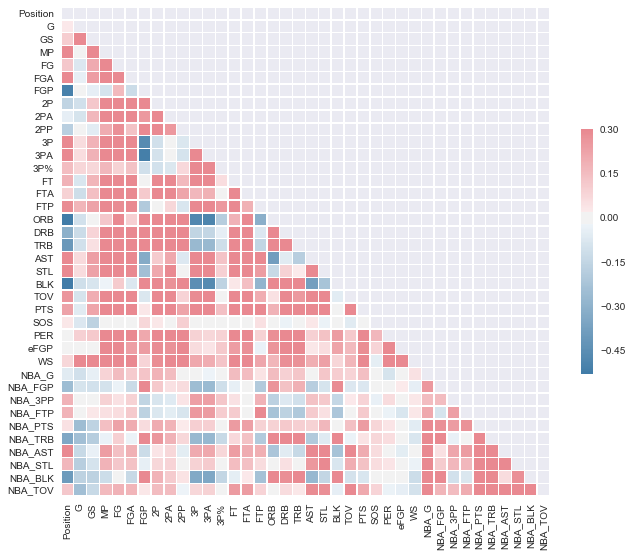

In [55]:
sns.set(style="dark")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Feature Selection

### Feature Ranking with Recursive Feature Elimination

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

for n in y.columns:
    rfe = RFE(model, 27)
    reg = rfe.fit(X_train, y_train[n])
    print(reg.support_)
    print(reg.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True 

### Feature Selection with Lasso Regression

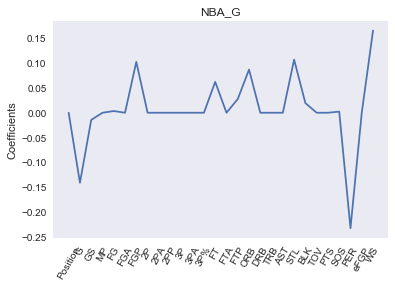

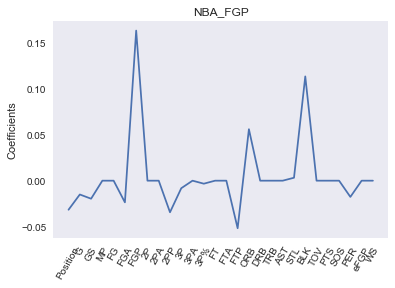

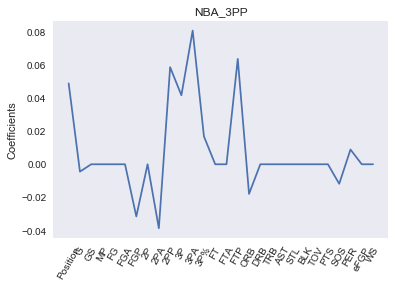

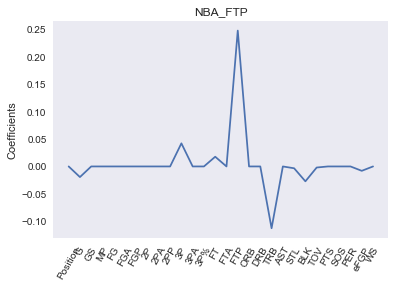

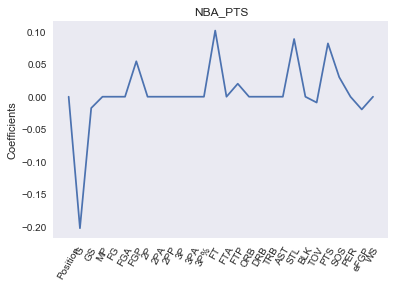

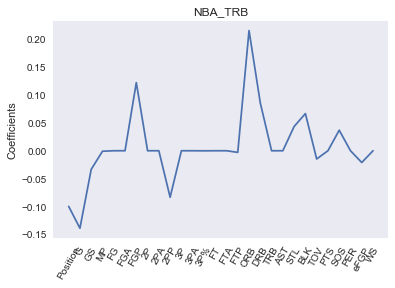

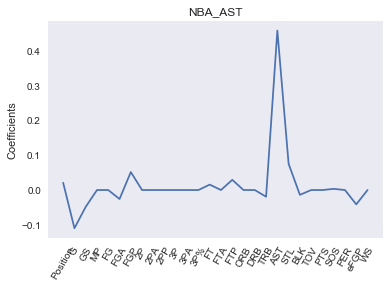

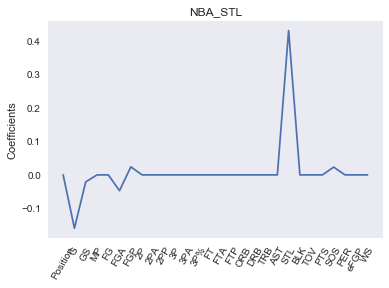

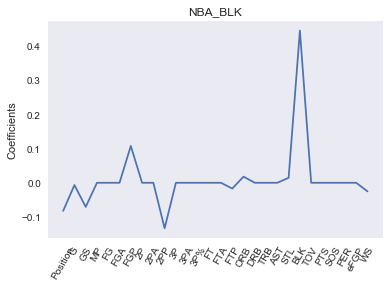

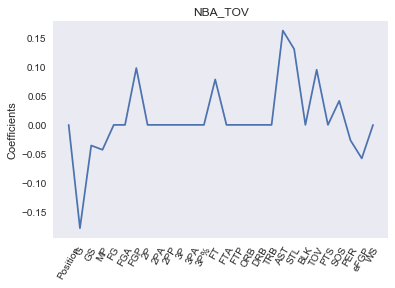

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001, normalize = True)
for n in y.columns: 
    lasso_coef = lasso.fit(X,y[n]).coef_
    _ = plt.plot(range(len(X.columns)), lasso_coef)
    _ = plt.xticks(range(len(X.columns)), X, rotation = 60)
    _ = plt.ylabel('Coefficients')
    _ = plt.title(n)
    plt.show()